# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [ ]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np
SEED = 1337

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [ ]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return (np.linalg.norm(X @ w - y) ** 2) / y.shape[0]

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return 2 * (X.T @ (X @ w - y)) / y.shape[0]

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [ ]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """

    history = [ w_init ]
    for i in range(0, n_iterations):
      history.append(history[-1] - lr * loss.calc_grad(X, y, history[-1]))
    return history[1:]

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

155.2625821435192
0.8670644395649494


In [ ]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

In [ ]:
import math
def my_plot_gd(data_list, columns = 4): # data_list is an array; each item is ( w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss, title )
    rows = math.ceil(len(data_list) / columns)
    figure, axes = plt.subplots(rows, columns, figsize = (7 * columns, 5 * rows))

    for index, (w_list, X, y, loss, title) in enumerate(data_list):
        w_list = np.array(w_list)
        meshgrid_space = np.linspace(-2, 2, 100)
        A, B = np.meshgrid(meshgrid_space, meshgrid_space)

        levels = np.empty_like(A)
        for i in range(A.shape[0]):
            for j in range(A.shape[1]):
                w_tmp = np.array([A[i, j], B[i, j]])
                levels[i, j] = loss.calc_loss(X, y, w_tmp)

        graph = axes.flatten()[index]
        graph.set_title(f'''GD trajectory ({title})''')
        graph.set_xlabel(r"$w_1$")
        graph.set_ylabel(r"$w_2$")
        graph.set_xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
        graph.set_ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
        graph.set_aspect("equal")
        graph.set_box_aspect(1)

        CS = graph.contour(
            A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
        )
        CB = plt.colorbar(CS, shrink=0.8, extend="both")

        graph.scatter(w_list[:, 0], w_list[:, 1])
        graph.plot(w_list[:, 0], w_list[:, 1])

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

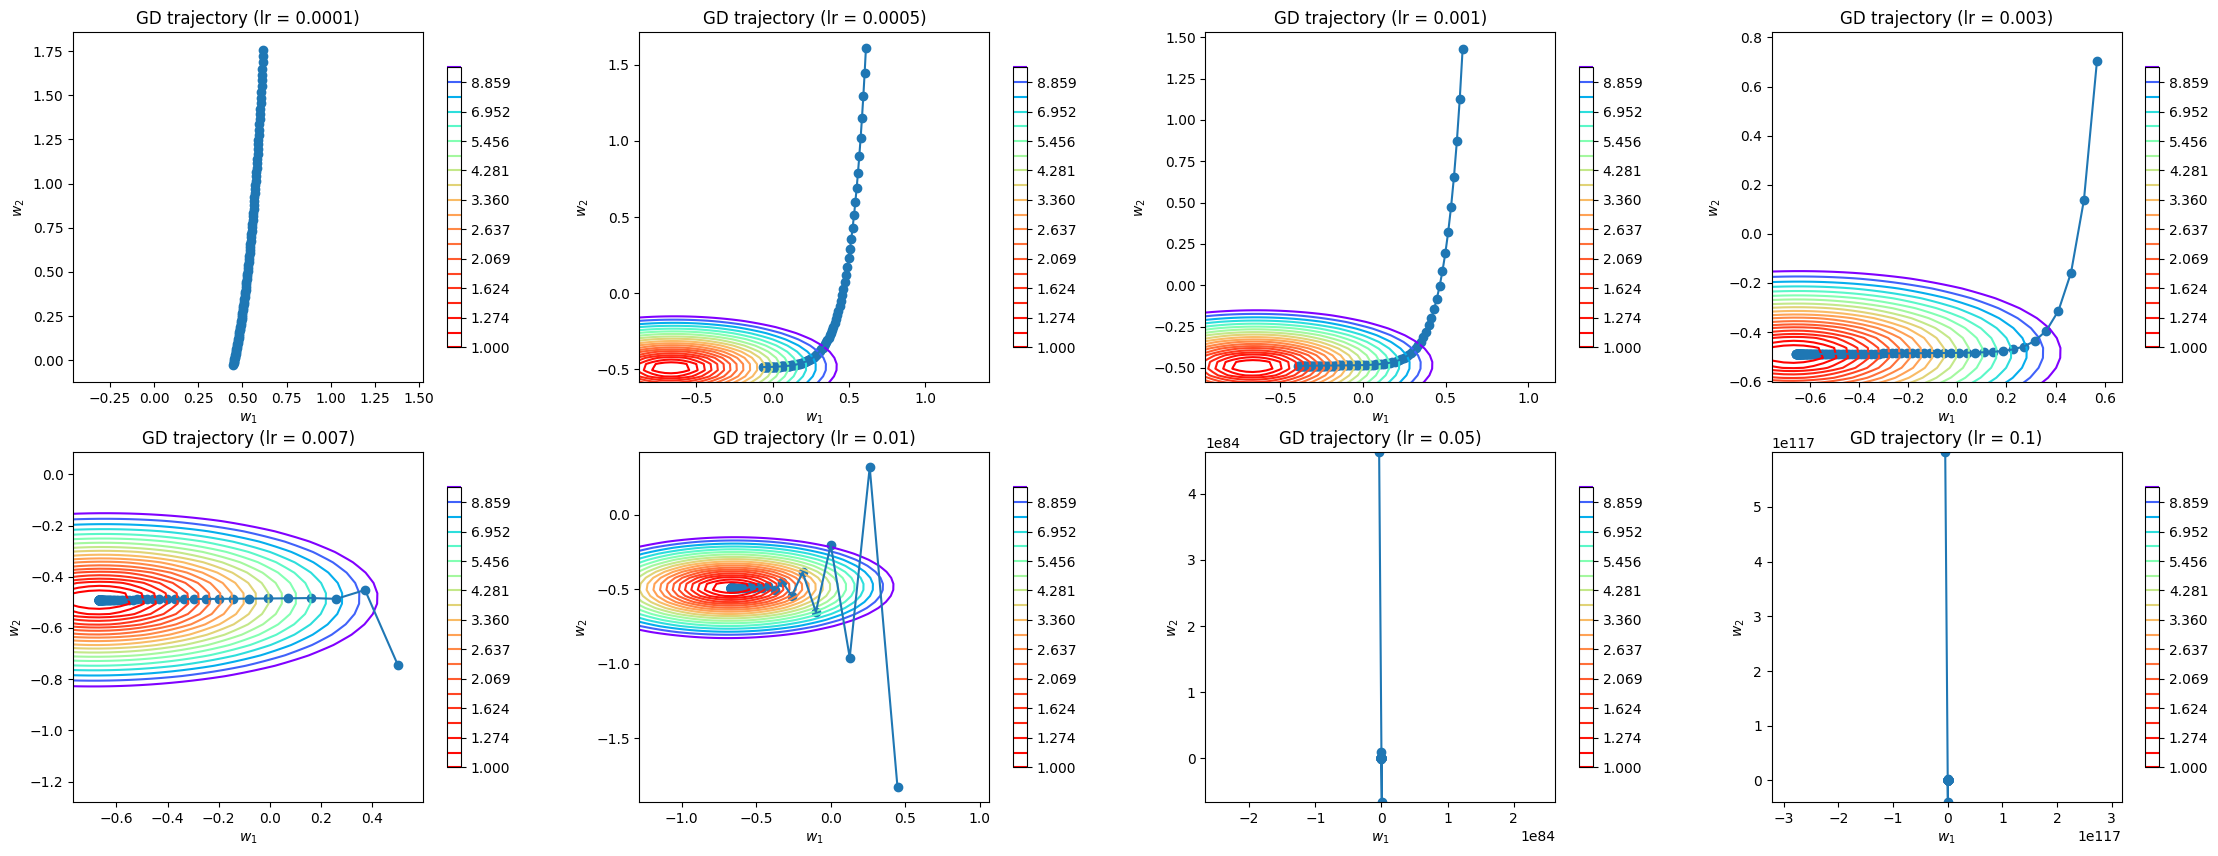

In [ ]:
def execute_gd(lr):
  return gradient_descent(w_init, X, y, loss, lr, 100), X, y, loss, f'''lr = {lr}'''
my_plot_gd([ *map(execute_gd, [ 0.0001, 0.0005, 0.001, 0.003, 0.007, 0.01, 0.05, 0.1 ]) ])

Параметр `lr` влияет в первую очередь на сходимость градиентного спуска. Заметим, что при `lr = 0.0001`, 100 итераций градиентного спуска даже не приблизились к минимуму функции. При `lr = 0.0005` и `lr = 0.01` финальное состояние оказалось близко к минимум, но всё равно не дошло до него. Тем не менее при `lr = 0.003` наблюдается "хорошая" траектория, заканчивающаяся возле минимума функции. Таким образом, это лучшее значение длины шага из рассмотренных. При дальнейшем увеличении длины шага наблюдаются скачки (при `lr = 0.007` явно видны первые два; при `lr = 0.01` - первые примерно 10 векторов весов "располагаются" совершенно странно), то есть градиентный спуск "перескакивает" минимум, что понижает его качество. При `lr = 0.05` и `lr = 0.1` траектория вовсе представляет собой вертикальную прямую с точкой с огромной положительной координатой (`1e84` и `1e117`). Таким образом, эти значения длины шага совершенно неэффективны при обучении градиентного спуска.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [ ]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """

    history = [ w_init ]
    for i in range(0, n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      history.append(history[-1] - lr * loss.calc_grad(X[batch_indices], y[batch_indices], history[-1]))
    return history[1:]

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

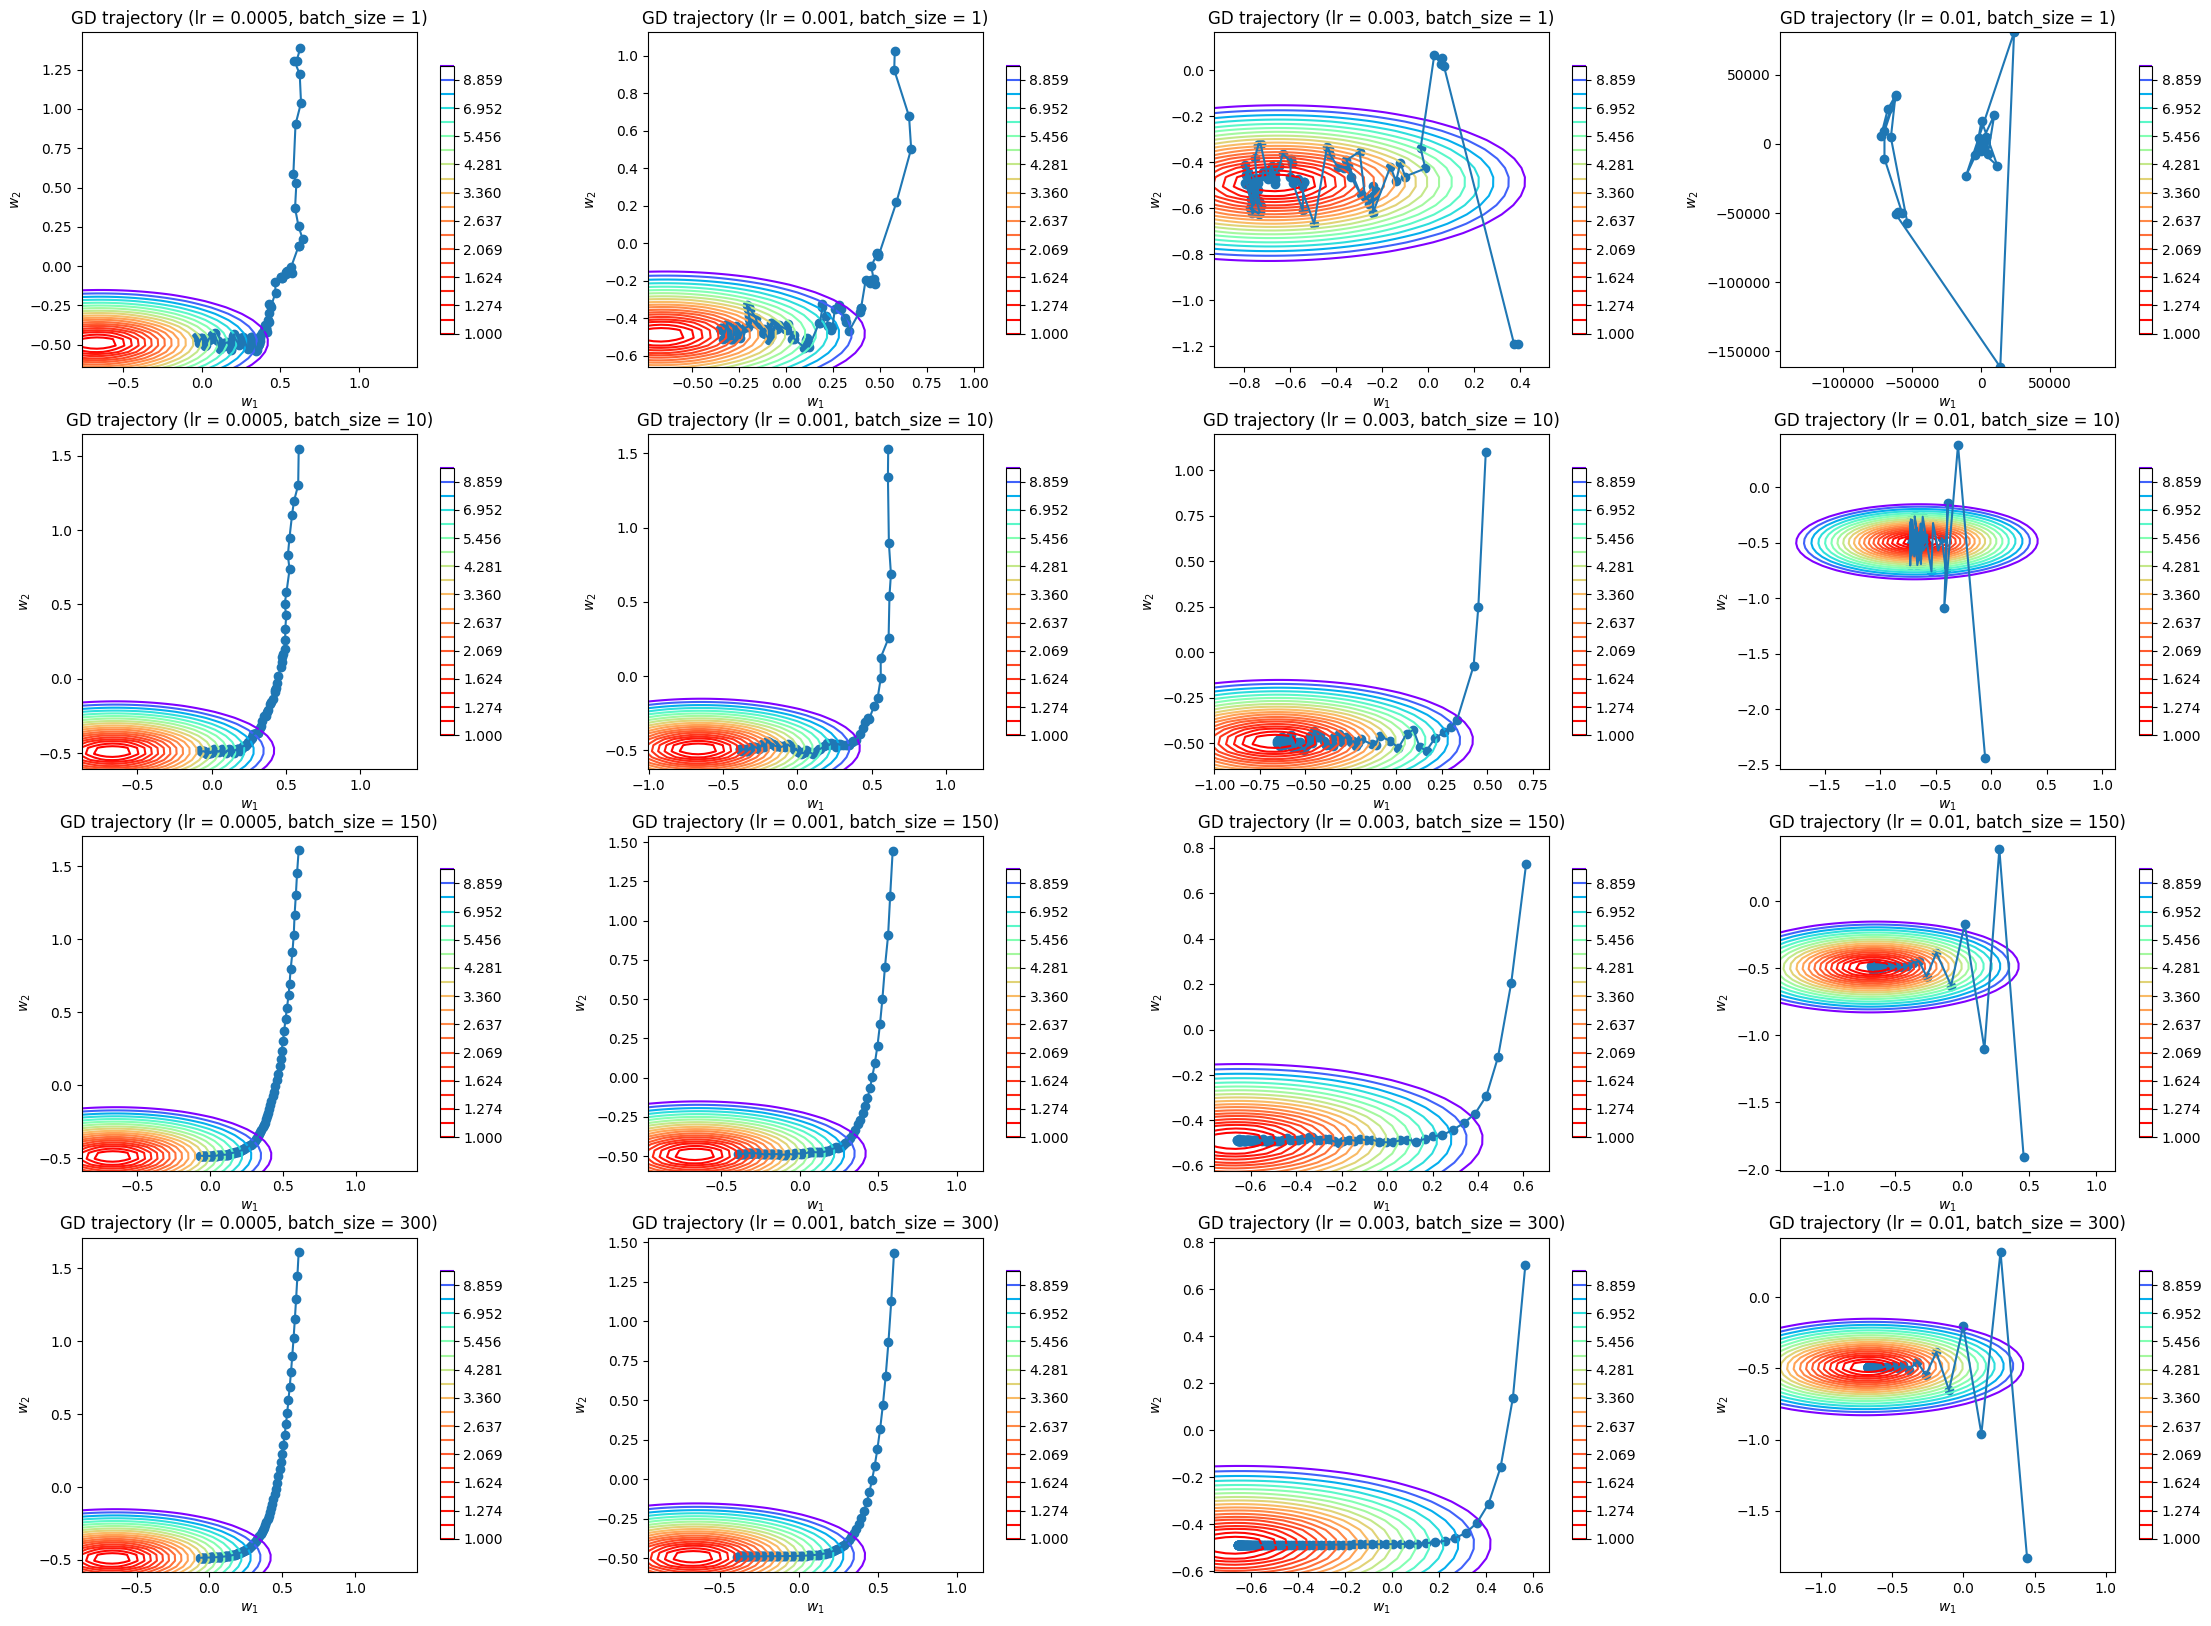

In [ ]:
def execute_sgd(params):
  (lr, batch_size) = params
  return stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, 100), X, y, loss, f'''lr = {lr}, batch_size = {batch_size}'''

np.random.seed(SEED)
my_plot_gd([
    *map(execute_sgd, [
        (0.0005, 1), (0.001, 1), (0.003, 1), (0.01, 1),
        (0.0005, 10), (0.001, 10), (0.003, 10), (0.01, 10),
        (0.0005, 150), (0.001, 150), (0.003, 150), (0.01, 150),
        (0.0005, 300), (0.001, 300), (0.003, 300), (0.01, 300)
    ])
])

1. Как и для обычного градиентного спуска, длина шага - параметр `lr` - влияет на сходимость стохастического градиентного спуска: при слишком маленьких значениях (`0.0005` и `0.001`) количества итераций не достаточно, чтобы дойти до минимума функции потерь, а при слишком больших (`0.01`) наблюдаются "скачки" и алгоритм "перепрыгивает" минимум.
2. Размер подвыборки - параметр `batch_size` - также влияет на сходимость стохастического градиентного спуска: чем больше размер выборки, тем более "гладкая" траектория спуска. При размере выборки `300`, ожидаемо, графики совпадают с соответствующими графиками для обычного градиентного спуска, а при размере выборки `1` наблюдается высокая изломанность траектории из-за использования слишком маленького количества объектов для вычисления градиента функции потерь. Для длины шага `0.01` с размером подвыборки `1` график вовсе представляет из себя очень странную фигуру.

Таким образом, поведение стохастического градиентного спуска отличается от обычного тем, что его сходимость дополнительно зависит от размера подвыборки: если он слишком мал, стохастический градиентный спуск имеет низкое качество.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [ ]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """

    history = [ w_init ]
    for i in range(0, n_iterations):
      lr_iter = lr * ((1 / (1 + (i + 1))) ** p)
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      history.append(history[-1] - lr_iter * loss.calc_grad(X[batch_indices], y[batch_indices], history[-1]))
    return history[1:]

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

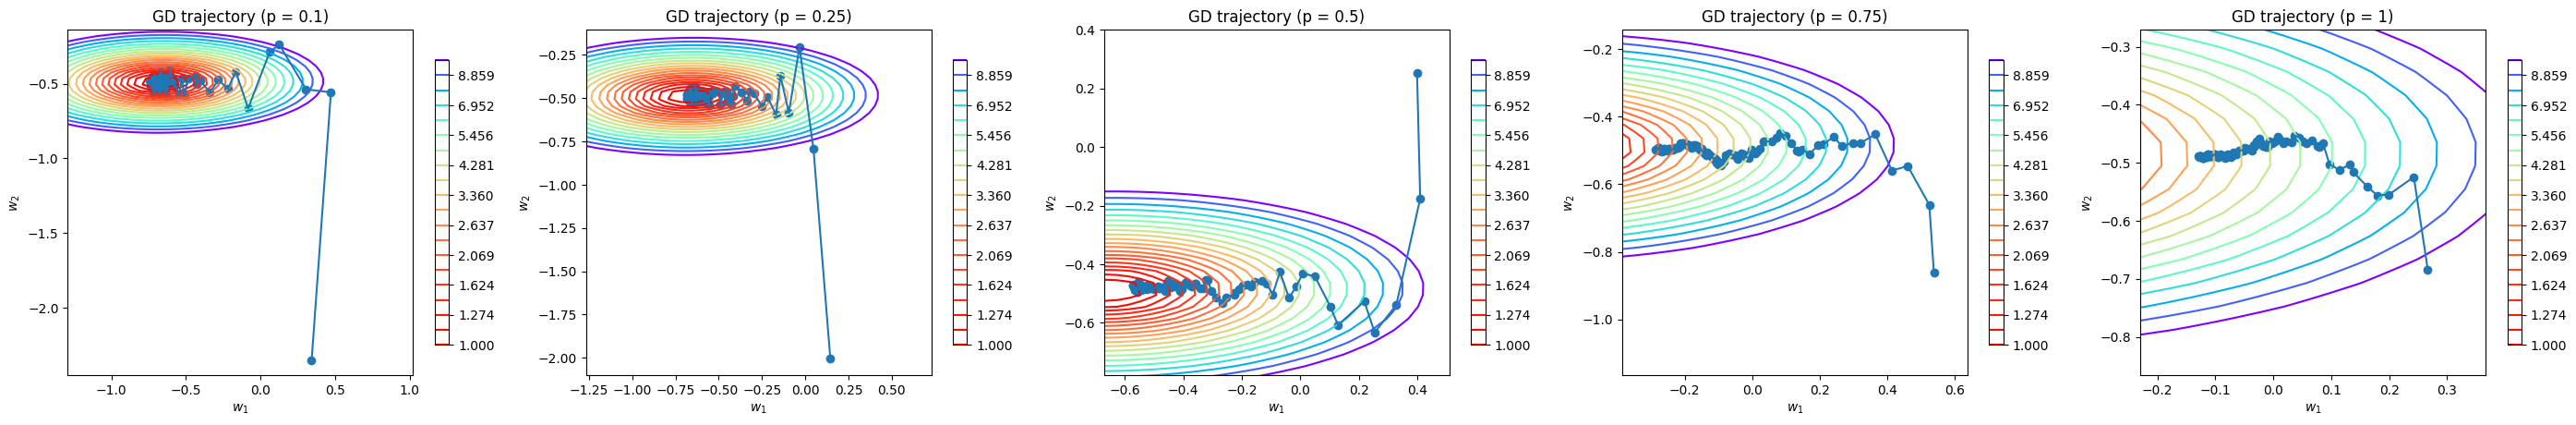

In [ ]:
def execute_sgd(p):
  return stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 100), X, y, loss, f'''p = {p}'''

np.random.seed(SEED)
my_plot_gd([ *map(execute_sgd, [ 0.1, 0.25, 0.5, 0.75, 1 ]) ], 5)

Из графиков видно, что при маленьких значениях `p` алгоритм быстрее приближается к минимуму. Но если значение слишком мало (`p = 0.1`), длины шагов велики даже на последних итерациях и градиентный спуск не может качественно найти минимум функции потерь, постоянно "перепрыгивая" его. При `p = 0.25` наблюдаются те же проблемы, но уже при `p = 0.5` длина шага уменьшается слишком сильно и алгоритм "не доходит" до минимума. Таким образом, оптимальное значение `p` лежит между `0.25` и `0.5`. При дальнейшем увеличении значения параметра сходимость алгоритма еще больше уменьшается и финальное состояние оказывается ещё дальше от истинного минимума.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

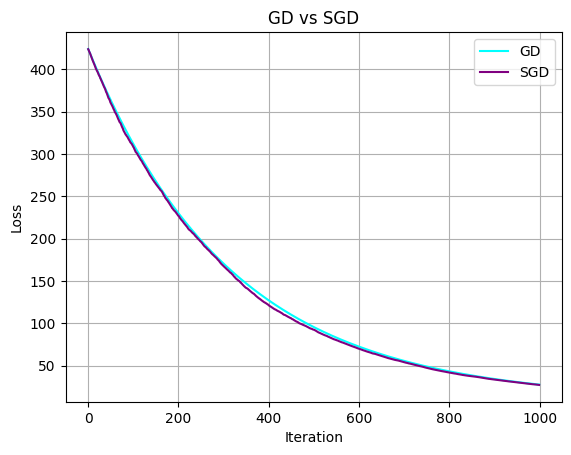

In [ ]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    history = [ w_init ]
    for i in range(0, n_iterations):
      history.append(history[-1] - lr * loss.calc_grad(X, y, history[-1]))
    return history[1:]

def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    history = [ w_init ]
    for i in range(0, n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      history.append(history[-1] - lr * loss.calc_grad(X[batch_indices], y[batch_indices], history[-1]))
    return history[1:]

ITERS = 1000
lr = 0.00001

np.random.seed(SEED)
gd_hist = gradient_descent(w_init, X, y, loss, lr, ITERS)
sgd_hist = stochastic_gradient_descent(w_init, X, y, loss, lr, 10, ITERS)

def calculate_loss(weights):
  return loss.calc_loss(X, y, weights)
iterations = np.arange(ITERS)
gd_loss = np.apply_along_axis(calculate_loss, -1, gd_hist)
sgd_loss = np.apply_along_axis(calculate_loss, -1, sgd_hist)

plt.plot(iterations, gd_loss, label = 'GD', color = 'cyan')
plt.plot(iterations, sgd_loss, label = 'SGD', color = 'purple')

plt.grid()
plt.legend()
plt.title("GD vs SGD")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

Преимущество SGD на этом графике выделить сложно: линии практически совпадают и лишь около 400-ой итерации SGD становится незначительно лучше. Получается, что используемый размер выборки достаточно велик для анализируемых данных и позволяет стохастическому градиентному спуску работать достаточно качественно. \
Главное преимущество SGD заключается в том, что он работает быстрее обычной версии. Но построенный график не позволяет это установить.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [ ]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        self.w = gradient_descent(np.zeros(X.shape[1]), X, y, self.loss, self.lr, 10000)[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X @ self.w

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [ ]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [ ]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)
X_raw

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
197,201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
198,202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
199,203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [ ]:
X_raw.columns = X_raw.columns.astype(str) # make column names strings
X_raw = X_raw.drop(columns = [ 'index' ]) # remove the "index" column that does not give much information
X_raw

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


In [ ]:
X_raw.isna().any(axis = None) # пропуски есть

True

In [ ]:
from sklearn.impute import SimpleImputer

cat_features_mask = (X_raw.dtypes == "object").values
real_features = X_raw.columns[~cat_features_mask]

X_real = X_raw[real_features]
mis_replacer = SimpleImputer(strategy = "mean")
X_no_mis_real = pd.DataFrame(data = mis_replacer.fit_transform(X_real.values), columns = X_real.columns)

X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)

X_no_mis.isna().any(axis = None) # пропусков нет

False

In [ ]:
X_no_mis.describe() # Всё выглядит хорошо. Больше пропущенных значений нет

,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000


In [ ]:
X_dum = pd.get_dummies(X_no_mis, drop_first=True)
X_dum

,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
197,-1.0,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
198,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
199,-1.0,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size = 0.3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,1.0,0.418848,0.271137,0.479104,0.512821,0.127273,0.513189,0.384615,0.757143,0.871429,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.2,0.376963,0.282799,0.467164,0.435897,0.254545,0.354926,0.198381,0.450000,0.661905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.445026,0.253644,0.416418,0.461538,0.072727,0.346005,0.036437,0.564793,0.565192,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.8,0.151832,0.311953,0.456716,0.444444,0.627273,0.314973,0.194332,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.000000,0.230321,0.367164,0.316239,0.236364,0.284329,0.194332,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.2,0.157068,0.655977,0.711940,0.726496,0.609091,0.605508,0.323887,0.885714,0.514286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
136,0.8,0.361257,0.344023,0.523881,0.452991,0.290909,0.475562,0.344130,0.771429,0.680952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
137,0.6,0.329843,0.230321,0.365672,0.299145,0.409091,0.209465,0.145749,0.435714,0.580952,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
138,0.4,0.298429,0.402332,0.626866,0.564103,0.572727,0.416990,0.194332,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [ ]:
linear_regression.fit(X_train, y_train)
linear_regression.w

array([-1554.75515407,  -907.18615249, -3314.4291607 ,  1581.21476913,
        9726.00454295, -2158.60040787,  9762.84332276, 15067.55872118,
       -3528.33932237,  -842.71109618,  -665.77026155,  9074.43072766,
        6362.23223866,  2702.96443958, -1190.01165966,  2164.03825139,
        9648.95140817, -3644.91280092, -3899.33248773, -3168.06423493,
           0.        ,  7513.84604031, -2439.91850996,  8436.80882898,
       -1674.16595092, -4977.51381619, -2067.79682502,  1342.99993336,
       -3247.50161808,  5227.92104015, -4487.10017853,   -48.32546109,
       -2084.71816969,  -997.50780088, -1271.74938556,  1380.05708834,
        2400.67535589,  1261.67506176,  -942.46728452,  -217.66820037,
       -3900.69772769, -4544.72787439, -4535.85474463, -4689.27581281,
        -762.68856771, -3706.97702095,  3844.69999595,  2182.11994439,
        1669.03874335,  1759.98182626, -1906.56864337,   606.05015465,
       -8240.21729354, -5241.8357342 , -4010.12119882,   839.12001103,
      

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [ ]:
from sklearn.metrics import mean_squared_error

linreg_train_error = mean_squared_error(y_train, linear_regression.predict(X_train))
linreg_test_error = mean_squared_error(y_test, linear_regression.predict(X_test))

print(f"Train: { linreg_train_error }")
print(f"Test:  { linreg_test_error }")

Train: 1680520.8786219482
Test:  11401850.97615567


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [ ]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """

        return (np.linalg.norm(X @ w - y) ** 2) / y.shape[0] + self.coef * (np.linalg.norm(w[:-1]) ** 2)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """

        wCopy = w.copy()
        wCopy[-1] = 0
        return 2 * (X.T @ (X @ w - y)) / y.shape[0] + 2 * self.coef * wCopy

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSEL2Loss(0.25))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [ ]:
linear_regression = LinearRegression(MSEL2Loss(0.004))
linear_regression.fit(X_train, y_train)

linreg_train_error = mean_squared_error(y_train, linear_regression.predict(X_train))
linreg_test_error = mean_squared_error(y_test, linear_regression.predict(X_test))

print(f"Train: { linreg_train_error }")
print(f"Test:  { linreg_test_error }")

Train: 2650468.3844973003
Test:  6124752.108142206


Было: \
Train: 1680520.8786219482 \
Test: 11401850.97615567 \
Стало: \
Train: 2650468.3844973003 \
Test: 6124752.108142206 \
Итог: стало лучше

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        Y = X @ w - y
        Y_flag = (np.abs(Y) < self.eps)
        sum_fine = (Y_flag * ((Y ** 2) / 2)).sum()
        sum_bad = ((~Y_flag) * (self.eps * (np.abs(Y) - self.eps / 2))).sum()
        return (sum_fine + sum_bad) / y.shape[0]

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        Y = X @ w - y
        Y_flag = (np.abs(Y) < self.eps)
        gradients = (Y_flag * Y) + ((~Y_flag) * (self.eps * np.sign(Y)))
        return (gradients.reshape(-1, 1) * X).sum(axis = 0) / y.shape[0]

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [ ]:
linear_regression = LinearRegression(HuberLoss(621.09))
linear_regression.fit(X_train, y_train)

linreg_train_error = mean_squared_error(y_train, linear_regression.predict(X_train))
linreg_test_error = mean_squared_error(y_test, linear_regression.predict(X_test))

print(f"Train: { linreg_train_error }")
print(f"Test:  { linreg_test_error }")

Train: 3444622.077670574
Test:  6562789.60489501


Было: \
Train: 1680520.8786219482 \
Test: 11401850.97615567 \
Стало: \
Train: 3444622.077670574 \
Test: 6562789.60489501 \
Итог: стало лучше

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

In [ ]:
# ░░░░░▄▀▀▀▄░░░░░░░░
# ▄███▀░◐░░░▌░░░░░░░
# ░░░░▌░░░░░▐░░░░░░░
# ░░░░▐░░░░░▐░░░░░░░
# ░░░░▌░░░░░▐▄▄░░░░░
# ░░░░▌░░░░▄▀▒▒▀▀▀▀▄
# ░░░▐░░░░▐▒▒▒▒▒▒▒▒▀▀▄
# ░░░▐░░░░▐▄▒▒▒▒▒▒▒▒▒▒▀▄
# ░░░░▀▄░░░░▀▄▒▒▒▒▒▒▒▒▒▒▀▄
# ░░░░░░▀▄▄▄▄▄█▄▄▄▄▄▄▄▄▄▄▄▀▄
# ░░░░░░░░░░░▌▌▌▌░░░░░
# ░░░░░░░░░░░▌▌░▌▌░░░░░
# ░░░░░░░░░▄▄▌▌▄▌▌░░░░░

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [ ]:
def simulated_annealing(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, loss: BaseLoss, p: float, n_iterations: int = 100000):
  history = [ w_init ]
  for i in range(0, n_iterations):
    new_w = history[-1] + np.random.standard_t(p, size=history[-1].shape)
    delta_loss = loss.calc_loss(X, y, new_w) - loss.calc_loss(X, y, history[-1])
    if (delta_loss > 0 and np.random.random() > np.exp(-delta_loss * (i + 1))):
        new_w = history[-1]
    history.append(new_w)
  return history[1:]

class LinearRegression:
    def __init__(self, loss: BaseLoss, p: float = 3) -> None:
        self.loss = loss
        self.p = p

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        self.w = simulated_annealing(np.zeros(X.shape[1]), X, y, self.loss, self.p, 10000)[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X @ self.w

In [ ]:
np.random.seed(SEED)
linear_regression = LinearRegression(MSELoss(), 1.1)
linear_regression.fit(X_train, y_train)

linreg_train_error = mean_squared_error(y_train, linear_regression.predict(X_train))
linreg_test_error = mean_squared_error(y_test, linear_regression.predict(X_test))

print(f"Train: { linreg_train_error }")
print(f"Test:  { linreg_test_error }")

Train: 2823659.642146539
Test:  6002690.613248832


Было: \
Train: 1680520.8786219482 \
Test: 11401850.97615567 \
Стало: \
Train: 2823659.642146539 \
Test: 6002690.613248832 \
Итог: стало лучше

In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


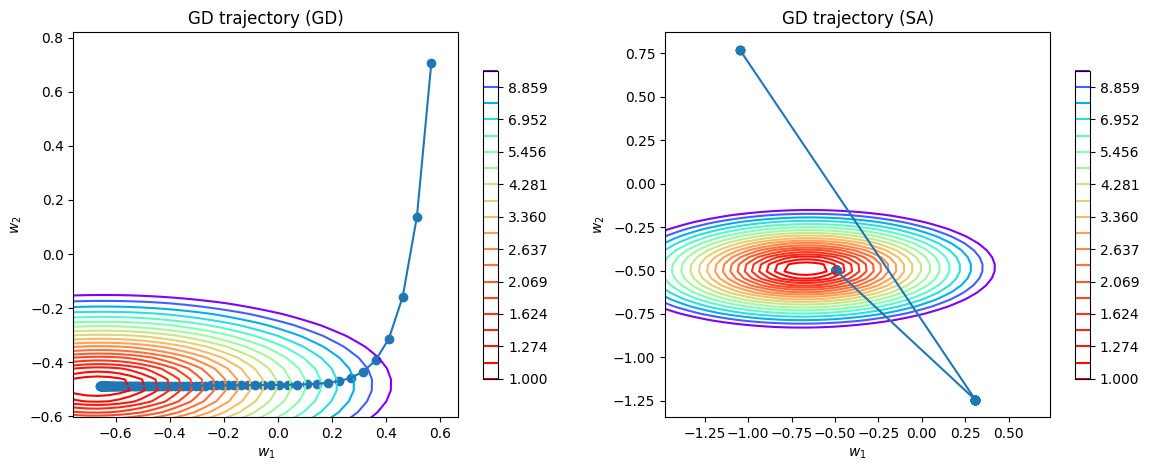

In [ ]:
np.random.seed(SEED)
hist1 = gradient_descent(w_init, X, y, MSELoss(), 0.003, 100)
np.random.seed(SEED)
hist2 = simulated_annealing(w_init, X, y, MSELoss(), 1.1, 100)

my_plot_gd([
    ( hist1, X, y, MSELoss(), f'''GD''' ),
    ( hist2, X, y, MSELoss(), f'''SA''' )
], 2)

Можно заметить, что траектория градиентного спуска более "гладкая", а имитация отжига быстро большими шагами приближается к искомому минимуму, после чего вектор весов практически не изменяется, и количества итераций не хватает, чтобы "добраться" до истинного минимума.